In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.preprocessing import OneHotEncoder


In [2]:
df = pd.read_csv('/content/Customer-Churn-Records.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [4]:
df.shape

(10000, 18)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


removing the columns which are not useful

In [7]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [8]:

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [9]:
# Checking missing values
df.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [10]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

visulising data


In [11]:
# Percentage of customer churn or stayed in the bank
total_customers = len(df)
churned_count = df[df['Exited'] == 1]['Exited'].count()
not_churned_count = df[df['Exited'] == 0]['Exited'].count()
percentage_churned = (churned_count / total_customers) * 100
percentage_not_churned = (not_churned_count / total_customers) * 100

print(f"Percentage of customers who churned: {percentage_churned:.2f}%")
print(f"Percentage of customers who did not churn: {percentage_not_churned:.2f}%")

Percentage of customers who churned: 20.38%
Percentage of customers who did not churn: 79.62%


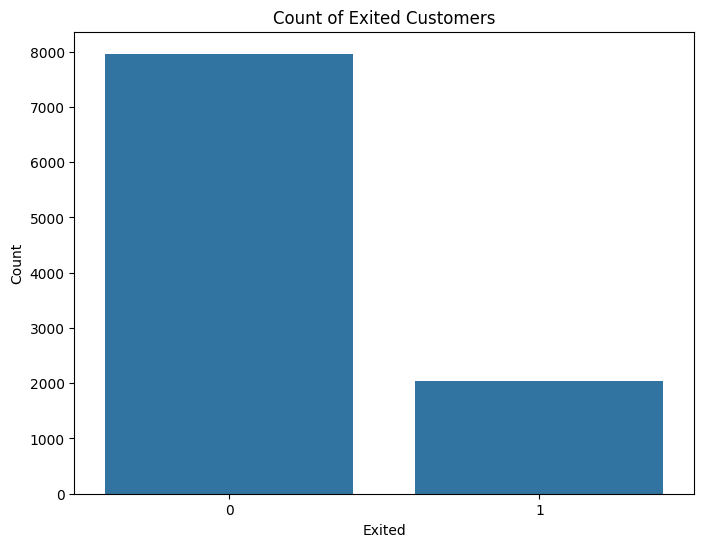

In [12]:
# Plotting a bar plot for the 'Exited' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Exited')
plt.title('Count of Exited Customers')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

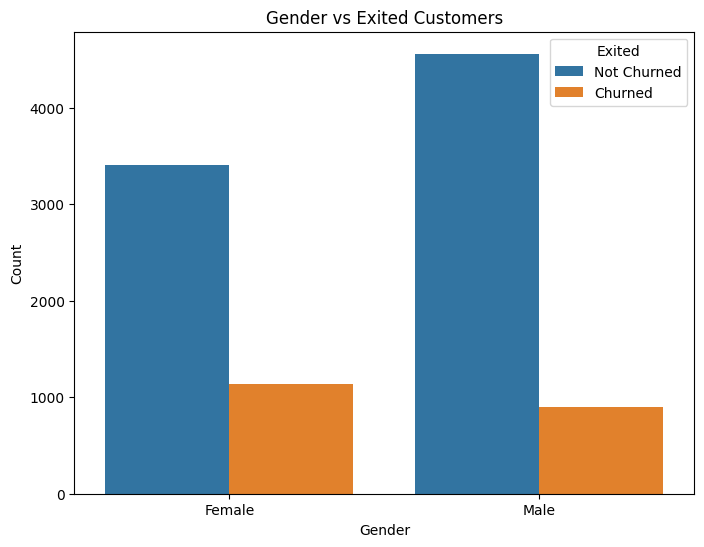

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Gender vs Exited Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

Insight: Female customers exhibit a higher tendency to churn the bank compared to male customers.

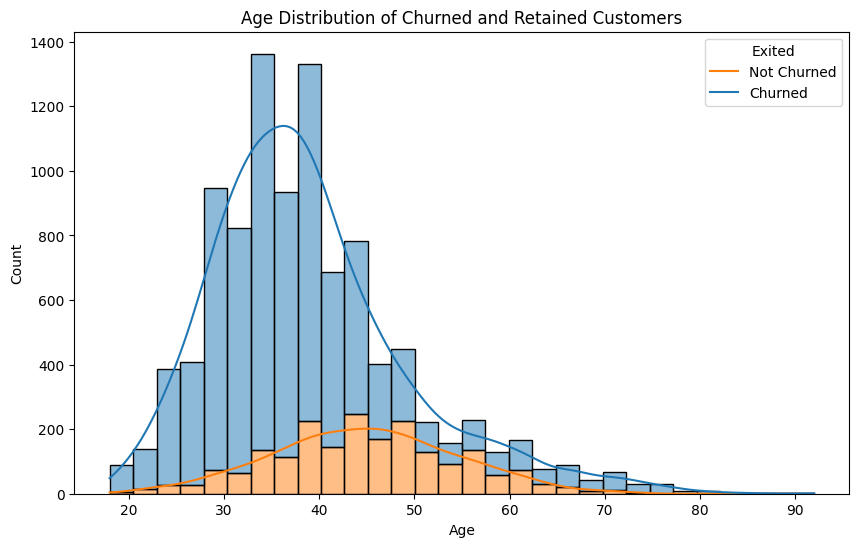

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Exited', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution of Churned and Retained Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

Insight: The age distribution of churned individuals appears right-skewed, indicating that the probability of older individuals not churning is higher.

In [15]:
df['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

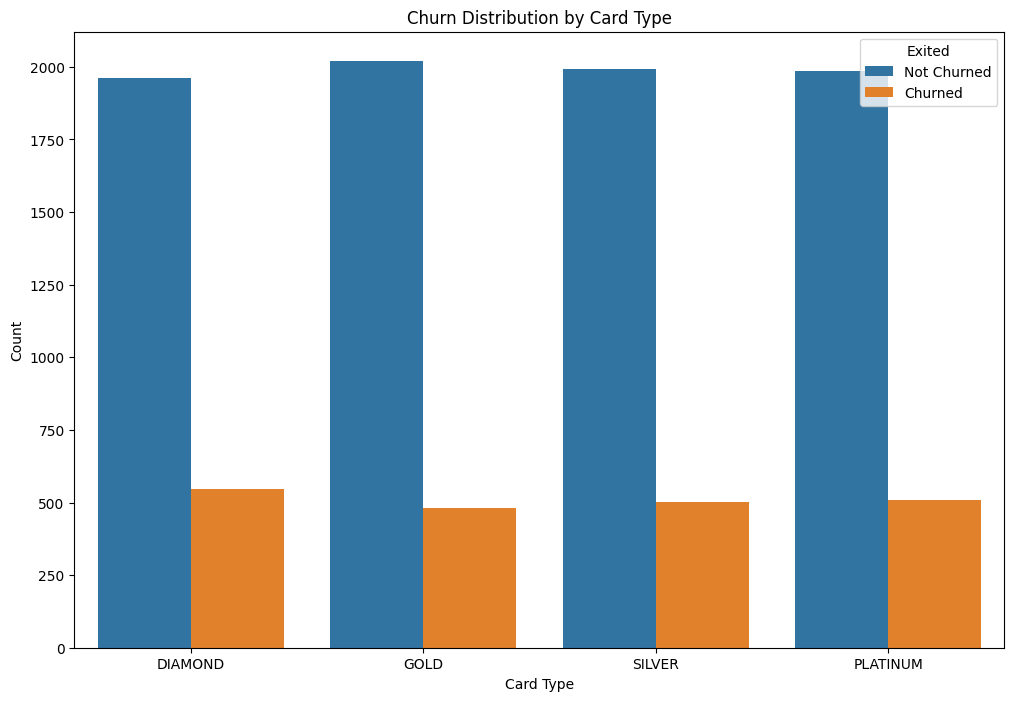

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Card Type', hue='Exited', order=['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'])
plt.title('Churn Distribution by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

Insight: There appears to be no significant effect of Card Type on customer churn or retention.

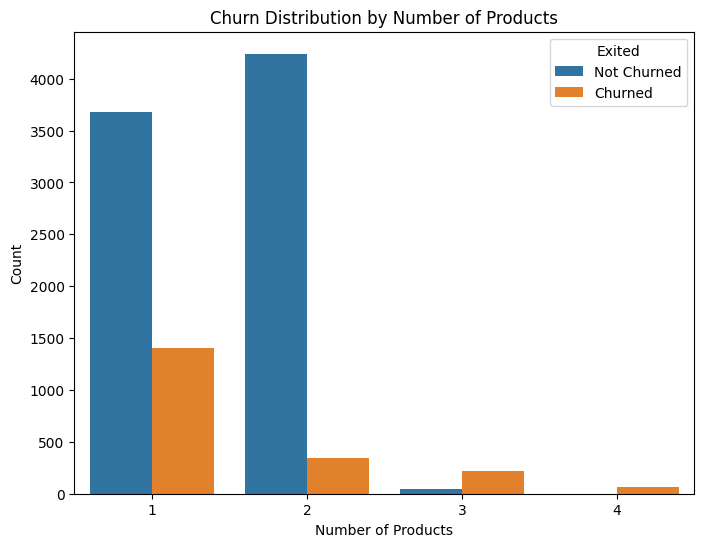

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='NumOfProducts', hue='Exited')
plt.title('Churn Distribution by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

Insight: Customers with a higher number of products (3 or 4) exhibit a higher probability of churn. Conversely, customers with only 2 products have a lower chance of leaving the bank compared to those with just 1 product

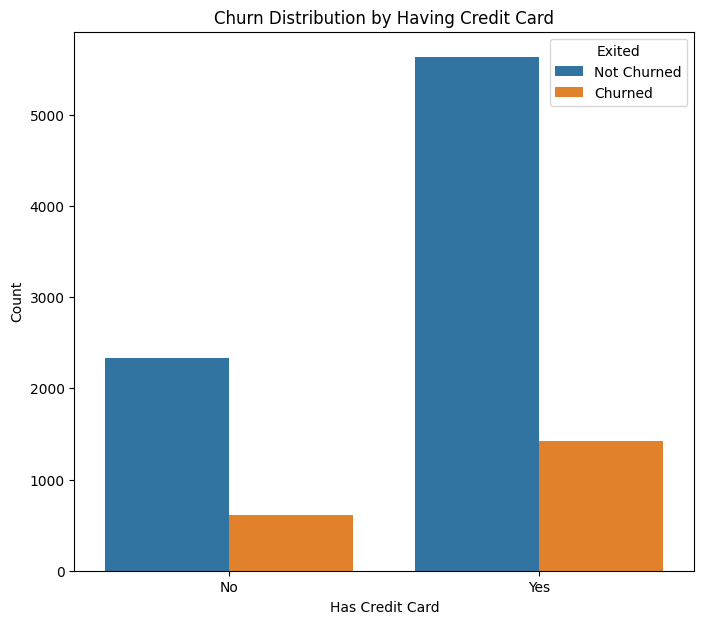

In [18]:
plt.figure(figsize=(8, 7))
sns.countplot(data=df, x='HasCrCard', hue='Exited')
plt.title('Churn Distribution by Having Credit Card')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Set x-axis labels as 'No' and 'Yes'
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()


Insight: The presence or absence of a credit card does not significantly affect whether a person churns or remains with the bank.

In [19]:
df['Satisfaction Score'].unique()

array([2, 3, 5, 4, 1])

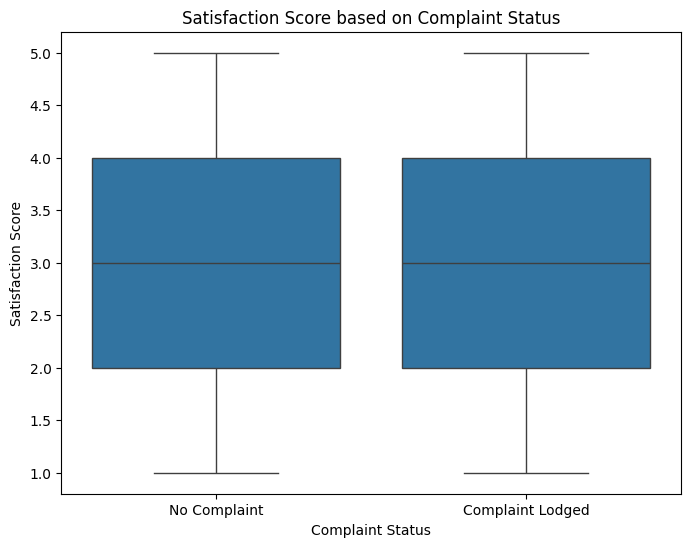

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Complain', y='Satisfaction Score')
plt.title('Satisfaction Score based on Complaint Status')
plt.xlabel('Complaint Status')
plt.ylabel('Satisfaction Score')
plt.xticks(ticks=[0, 1], labels=['No Complaint', 'Complaint Lodged'])  # Set x-axis labels
plt.show()

Insight: The satisfaction scores for customers who lodged a complaint and those who did not are similar, indicating a consistent level of satisfaction with the resolution of issues regardless of complaint status.

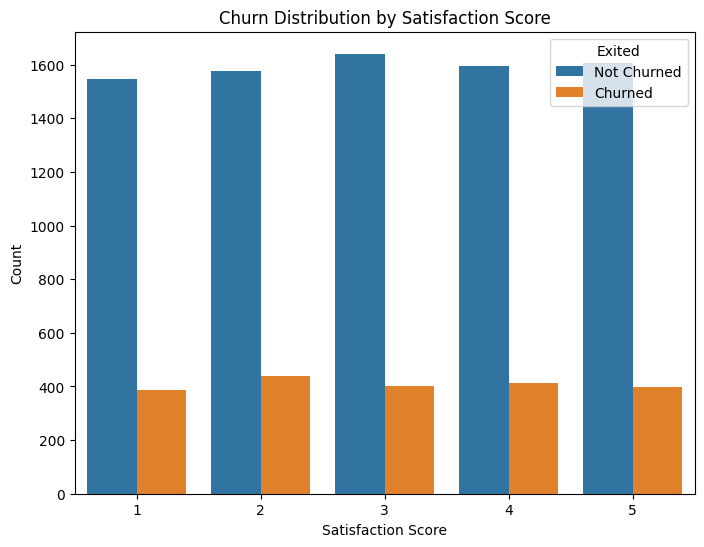

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Satisfaction Score', hue='Exited', order=[1, 2, 3, 4, 5])
plt.title('Churn Distribution by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

Insight: There appears to be no significant correlation between satisfaction scores and customer churn. Higher satisfaction scores do not seem to have a discernible impact on reducing churn rates.

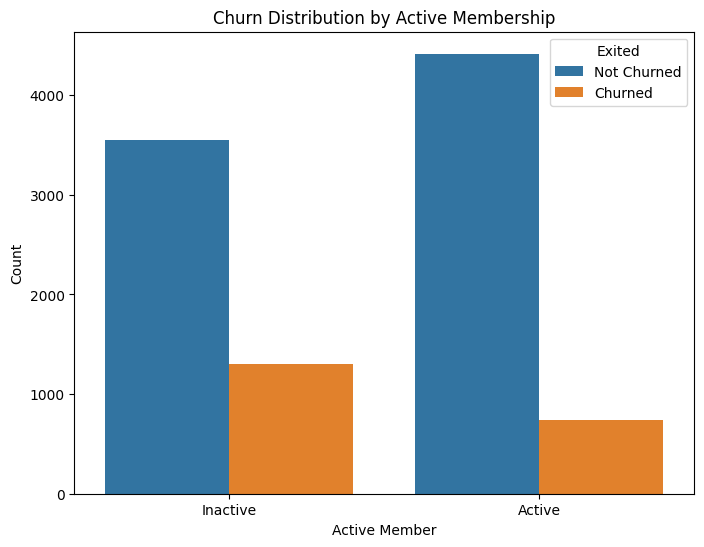

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='IsActiveMember', hue='Exited')
plt.title('Churn Distribution by Active Membership')
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'])  # Set x-axis labels
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

Insight: Active members tend to have a higher likelihood of staying (not churning) compared to inactive members.

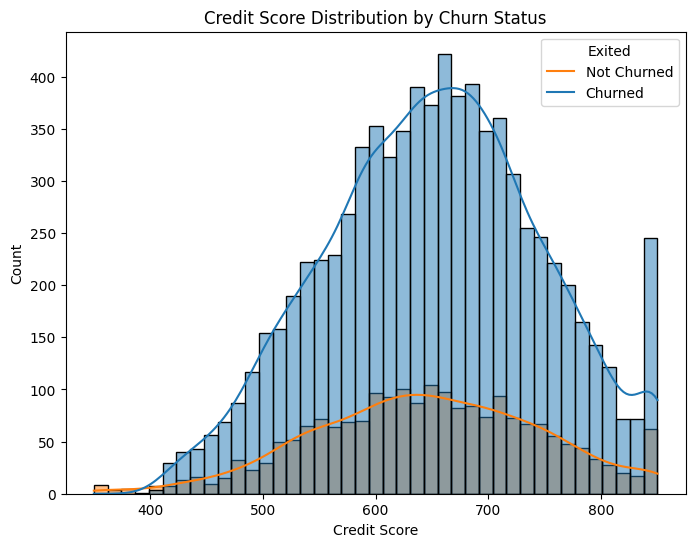

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='CreditScore', hue='Exited', kde=True)
plt.title('Credit Score Distribution by Churn Status')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

Insight:
Customers with lower credit scores (400-500 range) show a higher tendency to churn, indicating a likelihood for churn among this group.
Conversely, customers with higher credit scores (700-800 range) exhibit a greater tendency to stay with the service, suggesting higher retention rates among this cohort.

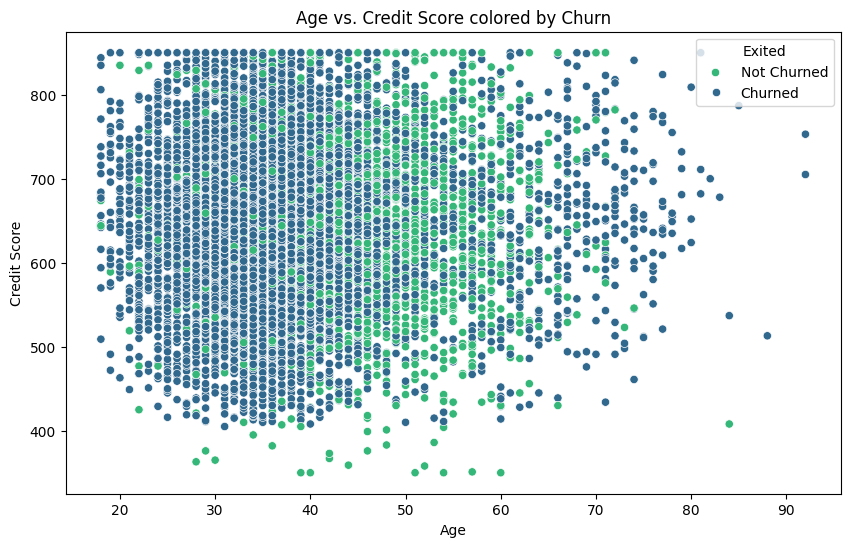

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='CreditScore', hue='Exited', palette='viridis')
plt.title('Age vs. Credit Score colored by Churn')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

Insights:
Age positively correlates with credit score, indicating older customers tend to have higher credit scores, attributed to their longer credit history and financial decisions over time.
Higher credit scores are associated with lower churn rates, reflecting greater financial stability among customers.
A cluster of churned customers is observed in the lower-left corner, likely younger individuals with lower credit scores, potentially facing financial constraints leading to a higher likelihood of churn.

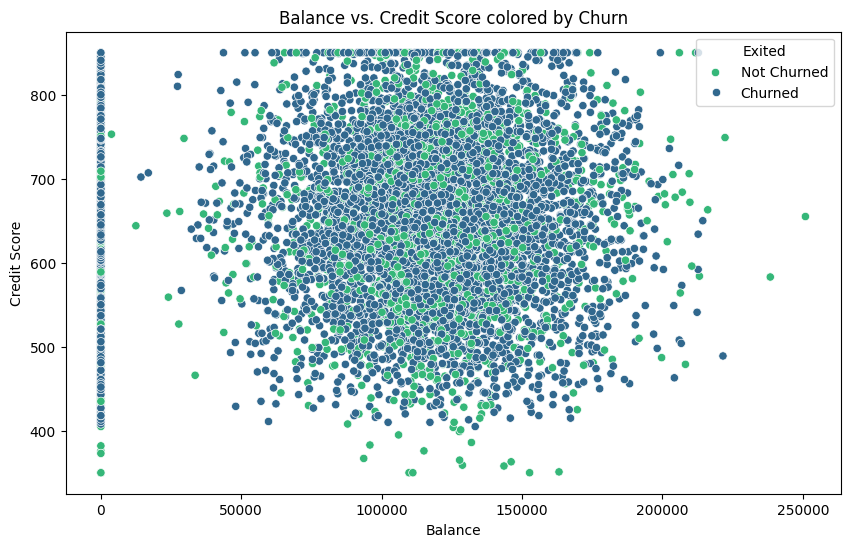

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Balance', y='CreditScore', hue='Exited', palette='viridis')
plt.title('Balance vs. Credit Score colored by Churn')
plt.xlabel('Balance')
plt.ylabel('Credit Score')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

Insights:

Negative correlation: Higher account balances tend to correspond with lower credit scores, possibly indicating higher debt impacting credit scores.
Credit score impact on churn: Favorable credit profiles are linked to lower churn rates, reflecting greater financial stability.
Churned customer cluster: Lower-right plot cluster represents customers with high balances and low credit scores, potentially facing financial strain leading to higher churn likelihood.

#DATA PREPARATION

In [26]:
cat_col

Index(['Geography', 'Gender', 'Card Type'], dtype='object')

In [27]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'
encoder = OneHotEncoder(sparse=False)
dummies = pd.DataFrame(encoder.fit_transform(df[cat_col]))
dummies.columns = encoder.get_feature_names_out(cat_col)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
df = pd.concat([df, dummies], axis = 1)

In [29]:
df.drop(cat_col, axis = 1, inplace = True)
df.shape

(10000, 21)

In [30]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


#splitting data

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [32]:
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']  # Target variable

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
9254,686,32,6,0.00,2,1,1,179093.26,0,2,510,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1561,632,42,4,119624.60,2,1,1,195978.86,0,4,959,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1670,559,24,3,114739.92,1,1,0,85891.02,1,4,327,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
6087,561,27,9,135637.00,1,1,0,153080.40,1,2,567,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6669,517,56,9,142147.32,1,0,0,39488.04,1,3,727,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


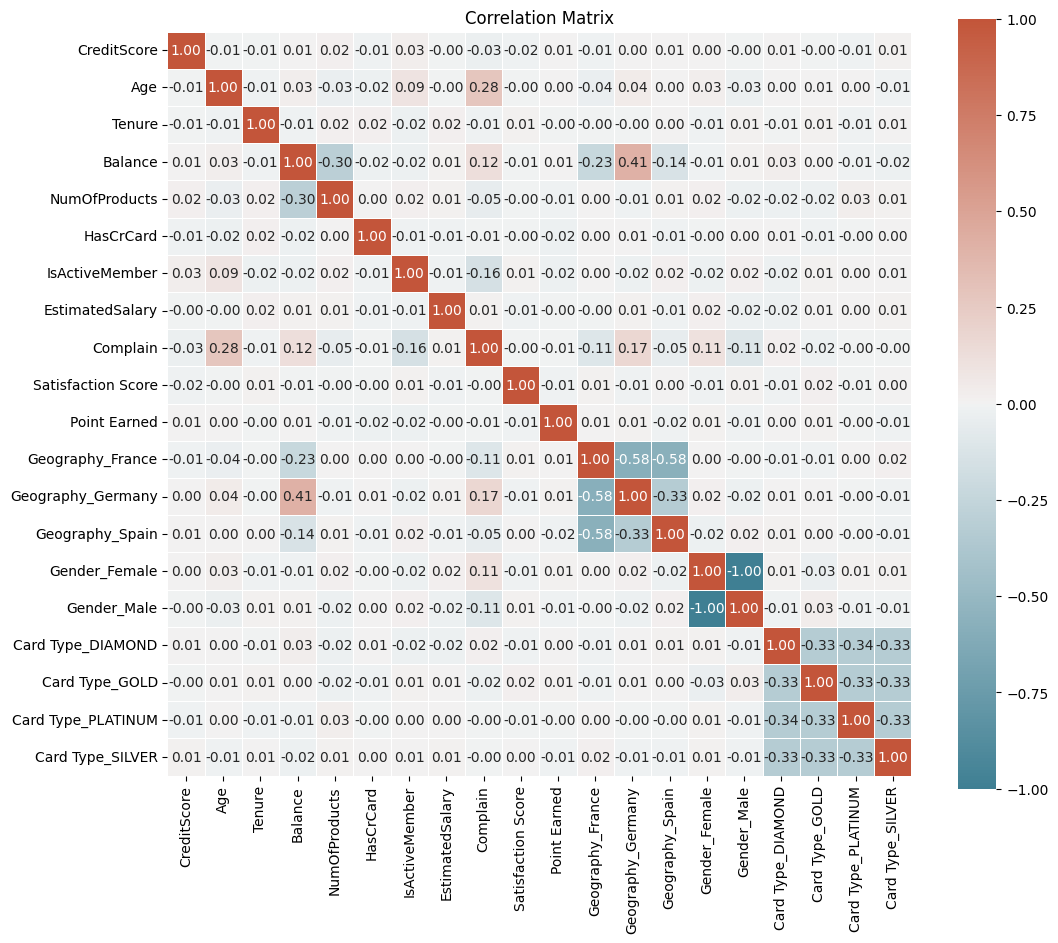

In [35]:
plt.figure(figsize=(12, 10))
corr = X_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", annot_kws={"size": 10}, square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Insights:

Credit Score: Positively correlated with multiple variables. Higher credit scores relate to higher account balances, more credit cards, higher estimated salaries, active membership, and lower churn and complaints.

Age: Positively correlated with tenure, balance, and number of products. Older customers typically have longer account tenures, higher balances, and more credit cards.

Tenure: Positively correlated with balance and number of products. Longer account tenures associate with higher balances and more credit cards.
Balance: Positively correlated with the number of products. Higher balances link to having more credit cards.

Number of Products: Positively correlated with having a credit card. More products are associated with a higher likelihood of having multiple credit cards.

Exited (Churned): Negatively correlated with most variables. Churned customers tend to have lower credit scores, balances, credit cards, estimated salaries, active memberships, and higher complaints.

Complained: Negatively correlated with most variables. Customers who complained tend to exhibit similar traits to churned customers, including lower credit scores, balances, credit cards, estimated salaries, and active memberships.

In [36]:
scaler = StandardScaler()
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [37]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
9254,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,-0.509942,-0.720010,-0.430193,1.001501,-0.579467,-0.576388,-0.913248,0.913248,1.729744,-0.577158,-0.580237,-0.573886
1561,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,-0.509942,0.704342,1.565908,-0.998501,1.725723,-0.576388,-0.913248,0.913248,-0.578120,-0.577158,1.723434,-0.573886
1670,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,1.961007,0.704342,-1.243749,-0.998501,-0.579467,1.734942,-0.913248,0.913248,-0.578120,-0.577158,-0.580237,1.742506
6087,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,1.961007,-0.720010,-0.176791,1.001501,-0.579467,-0.576388,1.094993,-1.094993,-0.578120,-0.577158,-0.580237,1.742506
6669,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,1.961007,-0.007834,0.534515,1.001501,-0.579467,-0.576388,-0.913248,0.913248,-0.578120,-0.577158,1.723434,-0.573886


In [38]:
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [39]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.999


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



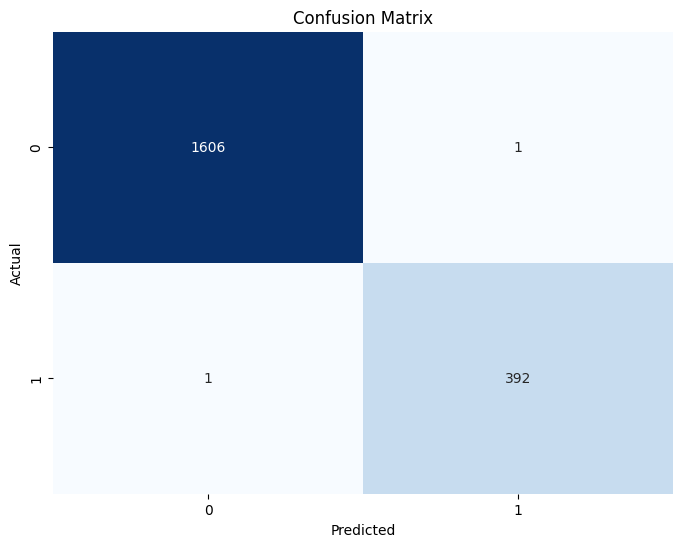

In [41]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [52]:

import shap

In [43]:
explainer = shap.LinearExplainer(lr, X_train, feature_perturbation="interventional")

/usr/local/lib/python3.10/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [44]:
shap_values = explainer.shap_values(X_test)

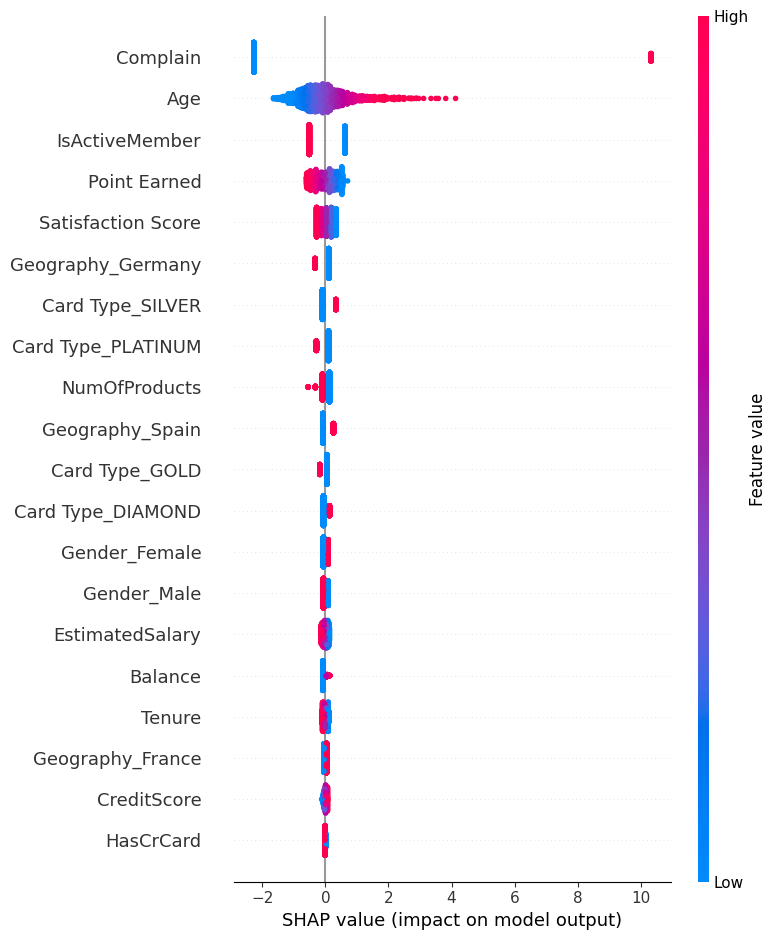

In [45]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

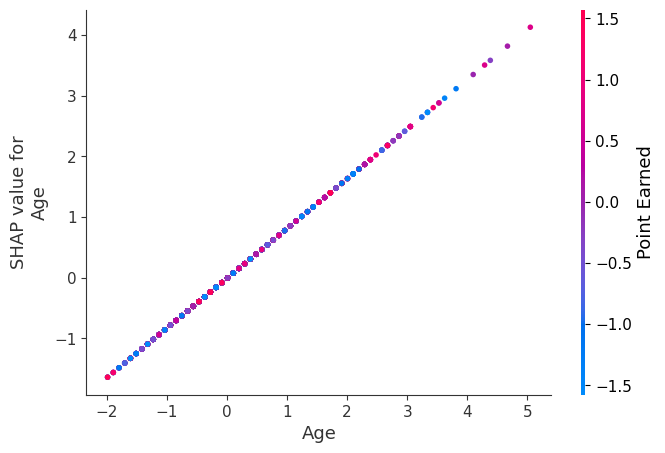

In [47]:

shap.dependence_plot('Age', shap_values, X_test, feature_names=X_test.columns)


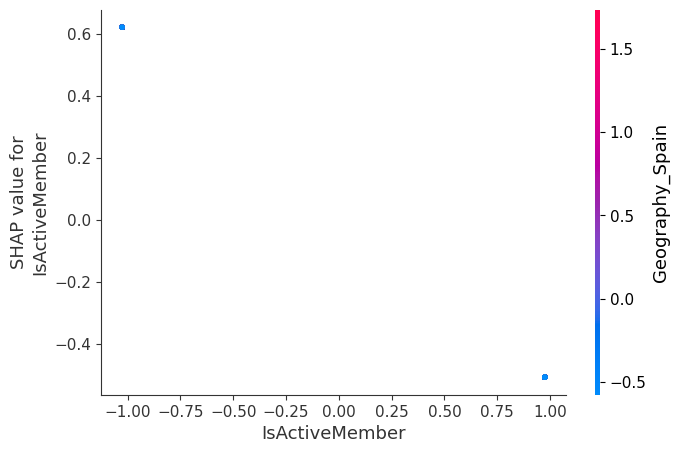

In [48]:
shap.dependence_plot('IsActiveMember', shap_values, X_test, feature_names=X_test.columns)

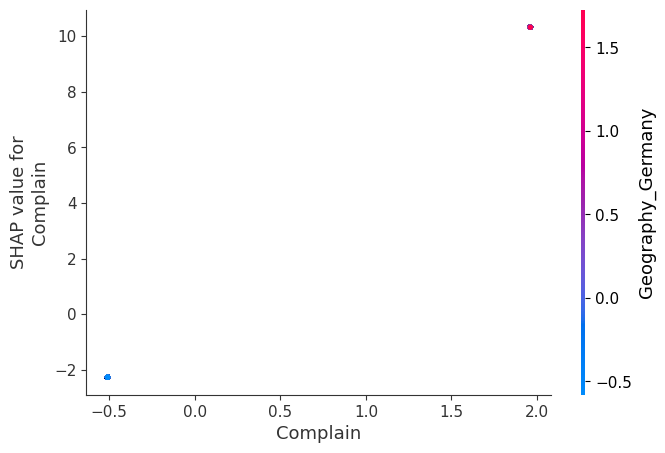

In [50]:
shap.dependence_plot('Complain', shap_values, X_test, feature_names=X_test.columns)